### Building and Visualizing a Dataset from Twitter

In [98]:
from textblob import TextBlob
import tweepy
import nltk
import re
import pandas as pd

In [99]:
# Your Twitter app credentials need to be added here - go to https://developer.twitter.com/en/apps
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [100]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

In [101]:
api = tweepy.API(twitter_auth)

In [105]:
# Let's grab a bunch of tweets
tweets = api.search("cork", count=1000)

In [106]:
# Storing a bunch of features from the tweets that may be useful for ML later
df = pd.DataFrame(columns=('tweet_text', 'sentiment',
                           'followers_count', 'friends_count',
                           'account_age', 'verified',
                           'favourites_count', 'tweets'))

# Note: Removing any URL's in the tweet text here also
for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text), 'sentiment': sentimentText.sentiment,
                    'followers_count': tweet.user.followers_count, 
                    'friends_count': tweet.user.friends_count,
                    'account_age': tweet.user.created_at,  # TODO: Convert to number of days since account creation
                    'verified': tweet.user.verified,
                    'favourites_count': tweet.user.favourites_count,
                    'tweets': tweet.user.statuses_count},
                   ignore_index=True)
    
df.head()

# TODO: Remove duplicates and RT's

,tweet_text,sentiment,followers_count,friends_count,account_age,verified,favourites_count,tweets
0,RT @SirWilliamOrpen: 'Storm at Kealkill' by Si...,"(0.0, 0.0)",566,317,2012-02-23 11:12:28,False,1856,4286
1,It's hat day at Ryerson today! I'm sportin' my...,"(0.0, 0.0)",32,38,2020-03-25 14:34:18,False,72,35
2,RT @drcsadlier: Today we disbanded the COVID w...,"(-0.25, 0.25)",819,269,2011-02-03 19:59:30,False,5130,6731
3,If the left want to know what stay alert means...,"(0.0, 0.0)",11208,10846,2014-11-20 13:29:36,False,59404,28498
4,"@louisecbarker For what it’s worth, there’s a ...","(0.4047619047619047, 0.5238095238095238)",544,778,2010-01-19 22:07:47,False,2917,3678


There are 10536 words in all tweets.
There are 8631 words in  all tweets with stopwords removed.


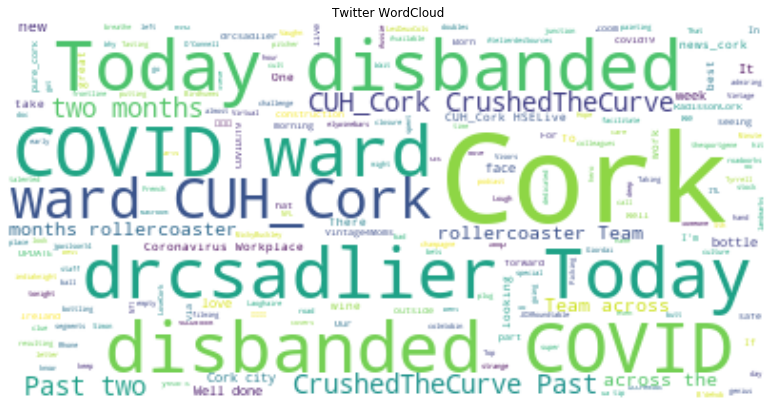

In [114]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

# Setup stop words
stop_words = stopwords.words('english') 
new_stopwords = ['RT', 'https://']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

# Remove stopwords
text = " ".join(review for review in df.tweet_text)
clean_text = " ".join(word for word in text.split() if word not in stop_words)

print ("There are {} words in all tweets.".format(len(text)))
print ("There are {} words in  all tweets with stopwords removed.".format(len(clean_text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(clean_text)

plt.figure( figsize=(15,7))
plt.axis("off")
plt.title("Twitter WordCloud")
plt.imshow(wordcloud, interpolation='bilinear')